In [11]:
# Developed 01/12/2017
# Analysis of CMS Data with Respect to ANMC Peformance

In [2]:
#Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib
import numpy as np
from __future__ import division

In [3]:
#Read in Results data from CSV - Data Gathered from SAS package
results = pd.read_csv("C:/CMS Measures Project/October Results and Raw Data/OctoberResults.csv")
#Read in Hospital Descriptive Data - Data from Data.gov
hosp = pd.read_csv("C:/CMS Measures Project/Data.gov/Hospital General Information.csv")
#Read in Raw data from CSV - Data provided with SAS package, not yet processed
raw = pd.read_csv("C:/CMS Measures Project/October Results and Raw Data/Raw.csv")

In [4]:
results


,Provider ID,Standardized Outcomes-Mortality Group Score,Lower bound - Outcomes-Mortality Group Score,Upper bound - Outcomes-Mortality Group Score,Standardized Outcomes-Readmission Group Score,Lower bound - Outcomes-Readmission Group Score,Upper bound - Outcomes-Readmission Group Score,Standardized Outcomes-Safety Group Score,Lower bound - Outcomes-Safety Group Score,Upper bound - Outcomes-Safety Group Score,...,Number of Measure Groups with >=3 Measuers,Number of Outcomes Measure Groups with >=3 Measuers,Indicator for reporting Star Rating,Outcomes-Mortality Group Categories,Outcomes-Readmission Group Categories,Outcomes-Safety Group Categories,Patient Experience Group Categories,Efficiency Imaging Group Categories,Process-Effectiveness Group Categories,Process-Timeliness Group Categories
0,10001,-0.274676,-0.914681,0.365330,0.111142,-0.156286,0.378569,1.227340,0.953277,1.501402,...,7,3,1,Same as the national average,Same as the national average,Above the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,10005,-1.761305,-2.521557,-1.001053,0.797415,0.417041,1.177789,0.205731,-0.195728,0.607189,...,7,3,1,Below the national average,Above the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average
2,10006,-1.773491,-2.442092,-1.104891,0.203123,-0.104445,0.510691,-0.161388,-0.487129,0.164353,...,7,3,1,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Above the national average
3,10007,-1.055230,-2.367871,0.257410,-0.969759,-1.746769,-0.192748,0.475790,-0.402230,1.353809,...,6,3,1,Same as the national average,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average
4,10008,-0.004201,-1.685265,1.676862,-0.045911,-1.252305,1.160483,-0.053829,-1.373889,1.266230,...,4,2,1,Same as the national average,Same as the national average,Same as the national average,missing,Same as the national average,Same as the national average,Above the national average
5,10011,-0.579974,-1.432370,0.272423,0.339331,-0.035968,0.714629,-0.636817,-1.017104,-0.256530,...,7,3,1,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Below the national average,Same as the national average
6,10012,-1.727394,-2.844070,-0.610717,0.112386,-0.531337,0.756109,-0.073944,-0.801836,0.653948,...,7,3,1,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average
7,10016,-0.762293,-1.635048,0.110462,0.973463,0.581873,1.365053,0.513108,0.090693,0.935523,...,7,3,1,Same as the national average,Above the national average,Above the national average,Below the national average,Below the national average,Above the national average,Below the national average
8,10018,NaN,NaN,NaN,NaN,NaN,NaN,0.004587,-1.778301,1.787474,...,2,0,0,missing,missing,Same as the national average,missing,missing,Below the national average,Same as the national average
9,10019,-0.931592,-1.801211,-0.061973,-0.594601,-1.015366,-0.173835,-0.535241,-0.990486,-0.079995,...,7,3,1,Below the national average,Below the national average,Below the national average,Below the national average,Below the national average,Same as the national average,Above the national average


In [15]:
# We can look at summary statistics and see if anything stands out right away 
raw.describe()

,PROVIDER_ID,HAI_1_DEN,HAI_2_DEN,HAI_3_DEN,HAI_4_DEN,HAI_5_DEN,HAI_6_DEN,HAI_1,HAI_2,HAI_3,...,PSI_90_SAFETY_DEN,MORT_30_CABG,MORT_30_CABG_DEN,READM_30_CABG,READM_30_CABG_DEN,AMI_7A,AMI_7A_DEN,CAC_3,CAC_3_DEN,Star Rating
count,4557.000000,2353.000000,2864.000000,2007.000000,846.000000,1806.000000,3241.000000,2353.000000,2864.000000,2007.000000,...,3224.000000,1038.000000,1038.000000,1027.000000,1027.000000,1.00,1.0,164.000000,164.000000,4557.000000
mean,266870.863726,14.257336,13.392663,4.384276,2.508796,4.648764,32.401828,0.539114,0.478738,0.963979,...,3401.273751,0.033316,129.751445,0.144071,127.119766,0.75,12.0,0.856402,120.981707,3.083827
std,156961.973126,20.283233,17.263454,3.960740,1.722453,5.251028,44.985178,0.509989,0.455443,0.795817,...,3632.495912,0.008723,103.285823,0.011269,100.876781,NaN,NaN,0.195467,130.458675,0.785623
min,10001.000000,1.008000,1.000000,1.000000,1.003000,1.005000,1.006000,0.000000,0.000000,0.000000,...,0.150500,0.014000,25.000000,0.109000,25.000000,0.75,12.0,0.000000,11.000000,1.000000
25%,140145.000000,3.158000,3.177750,1.849000,1.359750,1.661250,4.556000,0.207000,0.124500,0.403500,...,832.743225,0.027000,58.000000,0.137000,57.000000,0.75,12.0,0.827500,35.000000,3.000000
50%,260024.000000,7.117000,7.437500,3.141000,1.947000,2.635000,16.070000,0.464000,0.419000,0.836000,...,2257.468500,0.032000,98.500000,0.143000,96.000000,0.75,12.0,0.920000,69.000000,3.000000
75%,390163.000000,15.947000,16.135500,5.421500,3.053250,5.266250,42.376000,0.741000,0.700250,1.407500,...,4711.504300,0.038000,166.750000,0.151000,162.500000,0.75,12.0,0.970000,157.250000,4.000000
max,670112.000000,221.440000,198.673000,52.779000,15.267000,52.370000,593.986000,5.190000,7.014000,5.216000,...,45742.504600,0.083000,794.000000,0.199000,785.000000,0.75,12.0,1.000000,813.000000,5.000000


In [16]:
# We can also look directly at the data, note how many null values there are
raw

,PROVIDER_ID,HAI_1_DEN,HAI_2_DEN,HAI_3_DEN,HAI_4_DEN,HAI_5_DEN,HAI_6_DEN,HAI_1,HAI_2,HAI_3,...,PSI_90_SAFETY_DEN,MORT_30_CABG,MORT_30_CABG_DEN,READM_30_CABG,READM_30_CABG_DEN,AMI_7A,AMI_7A_DEN,CAC_3,CAC_3_DEN,Star Rating
0,10001,9.198,20.321,5.347,1.721,7.111,47.018,1.740,1.427,1.870,...,10000.2328,0.042,278.0,0.151,273.0,NaN,NaN,NaN,NaN,3
1,10005,3.767,10.965,2.594,NaN,1.441,17.293,1.062,0.456,0.386,...,4491.9438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,10006,17.577,23.383,3.226,NaN,3.173,33.115,0.341,0.641,0.310,...,6931.6043,0.041,139.0,0.152,134.0,NaN,NaN,NaN,NaN,2
3,10007,NaN,1.547,NaN,NaN,NaN,3.699,NaN,0.000,NaN,...,782.0985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,10008,NaN,NaN,NaN,NaN,NaN,1.711,NaN,NaN,NaN,...,236.5616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5,10011,23.333,30.354,6.302,1.304,5.651,87.126,0.557,0.395,1.428,...,5016.2023,0.037,133.0,0.150,128.0,NaN,NaN,NaN,NaN,2
6,10012,NaN,4.310,NaN,NaN,NaN,8.897,NaN,0.000,NaN,...,1226.4063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
7,10016,13.734,22.812,6.918,NaN,1.898,32.987,0.364,0.351,0.723,...,4032.4011,0.036,60.0,0.158,56.0,NaN,NaN,NaN,NaN,3
8,10018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.0292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
9,10019,2.871,11.238,2.365,NaN,1.678,16.161,0.697,0.089,0.423,...,3441.1928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [17]:
#Introduce new column counting nulls, lets see how much of our dataset is null
raw['nulls'] = raw.isnull().sum(axis=1)
print "Percent of Raw Data with null values : ", 100*raw['nulls'].sum()/(raw.shape[1]*raw.shape[0])

Percent of Raw Data with null values :  41.9047619048


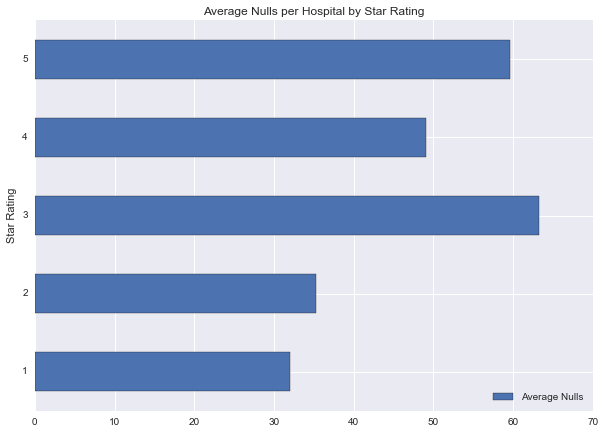

In [18]:
#So there is clearly a lot of null data, how does the presence of null data effect Hospital Star Rating
#Naively we might expect to find that hospitals which reported more data are scoring higher

nulls_rating = raw.groupby('Star Rating')['nulls'].sum()/raw.groupby("Star Rating")["PROVIDER_ID"].count()
df = pd.DataFrame({'Star Rating':nulls_rating.index, 'Average Nulls':nulls_rating.values})
df.plot(kind="barh", y="Average Nulls", x="Star Rating",  title='Average Nulls per Hospital by Star Rating', figsize=(10,7))

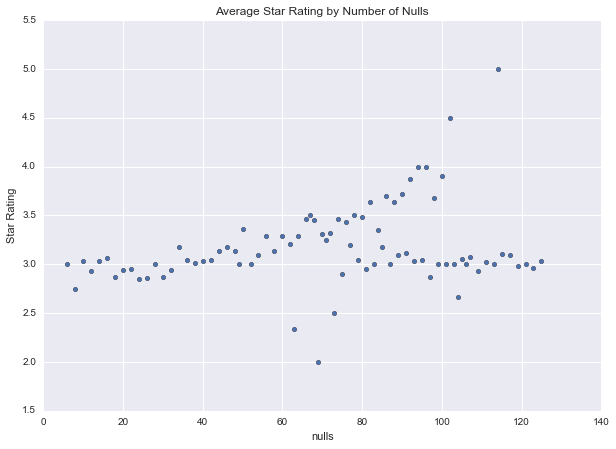

In [19]:
# So it appears that in fact hospitals with higher star ratings tend to report less data.
# We could also look at this question by looking at the average star rating per number of nulls

plt.figure(figsize=(10,7))
avg_r = raw.groupby("nulls")["Star Rating"].mean()
avg_r = avg_r.to_frame()
avg_r["nulls"] = avg_r.index
avg_r.plot(kind="scatter", x="nulls", y="Star Rating", title='Average Star Rating by Number of Nulls', figsize=(10,7))

In [20]:
# So its very obvious from looking at the raw data that the measures which a hospital chooses to report
# Have a very signficant impact. Its not just about the data that the hosptial produces, its what it shows the world.
# With that in mind lets start looking at the results. 


#The first run of results

#results = results.rename(columns ={'PROVIDER_ID' : 'Provider ID',  'star':'Star Rating','summary_score':'Hospital Summary Score',
#                                  'Std_Outcomes_Mortality_score':'Standardized Outcomes-Mortality Group Score',
#                                 'Std_Outcomes_Readmission_score':'Standardized Outcomes-Readmission Group Score',
#                                'Std_Outcomes_Safety_score':'Standardized Outcomes-Safety Group Score',
#                               'Std_PatientExp_score':'Standardized Patient Experience Group Score',
#                              'Std_Efficiency_score':'Standardized Efficiency Group Score',
#                             'Std_Process_Effect_score':'Standardized Process-Effectiveness Group Score',
#                            'Std_Process_Time_score':'Standardized Process-Timeliness Group Score'
#                                  })
results

,Provider ID,Standardized Outcomes-Mortality Group Score,Lower bound - Outcomes-Mortality Group Score,Upper bound - Outcomes-Mortality Group Score,Standardized Outcomes-Readmission Group Score,Lower bound - Outcomes-Readmission Group Score,Upper bound - Outcomes-Readmission Group Score,Standardized Outcomes-Safety Group Score,Lower bound - Outcomes-Safety Group Score,Upper bound - Outcomes-Safety Group Score,...,Number of Measure Groups with >=3 Measuers,Number of Outcomes Measure Groups with >=3 Measuers,Indicator for reporting Star Rating,Outcomes-Mortality Group Categories,Outcomes-Readmission Group Categories,Outcomes-Safety Group Categories,Patient Experience Group Categories,Efficiency Imaging Group Categories,Process-Effectiveness Group Categories,Process-Timeliness Group Categories
0,10001,-0.274676,-0.914681,0.365330,0.111142,-0.156286,0.378569,1.227340,0.953277,1.501402,...,7,3,1,Same as the national average,Same as the national average,Above the national average,Below the national average,Same as the national average,Same as the national average,Same as the national average
1,10005,-1.761305,-2.521557,-1.001053,0.797415,0.417041,1.177789,0.205731,-0.195728,0.607189,...,7,3,1,Below the national average,Above the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average
2,10006,-1.773491,-2.442092,-1.104891,0.203123,-0.104445,0.510691,-0.161388,-0.487129,0.164353,...,7,3,1,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Same as the national average,Above the national average
3,10007,-1.055230,-2.367871,0.257410,-0.969759,-1.746769,-0.192748,0.475790,-0.402230,1.353809,...,6,3,1,Same as the national average,Below the national average,Same as the national average,Same as the national average,Below the national average,Same as the national average,Above the national average
4,10008,-0.004201,-1.685265,1.676862,-0.045911,-1.252305,1.160483,-0.053829,-1.373889,1.266230,...,4,2,1,Same as the national average,Same as the national average,Same as the national average,missing,Same as the national average,Same as the national average,Above the national average
5,10011,-0.579974,-1.432370,0.272423,0.339331,-0.035968,0.714629,-0.636817,-1.017104,-0.256530,...,7,3,1,Same as the national average,Above the national average,Below the national average,Below the national average,Same as the national average,Below the national average,Same as the national average
6,10012,-1.727394,-2.844070,-0.610717,0.112386,-0.531337,0.756109,-0.073944,-0.801836,0.653948,...,7,3,1,Below the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Same as the national average,Above the national average
7,10016,-0.762293,-1.635048,0.110462,0.973463,0.581873,1.365053,0.513108,0.090693,0.935523,...,7,3,1,Same as the national average,Above the national average,Above the national average,Below the national average,Below the national average,Above the national average,Below the national average
8,10018,NaN,NaN,NaN,NaN,NaN,NaN,0.004587,-1.778301,1.787474,...,2,0,0,missing,missing,Same as the national average,missing,missing,Below the national average,Same as the national average
9,10019,-0.931592,-1.801211,-0.061973,-0.594601,-1.015366,-0.173835,-0.535241,-0.990486,-0.079995,...,7,3,1,Below the national average,Below the national average,Below the national average,Below the national average,Below the national average,Same as the national average,Above the national average


In [21]:
# Summary level data for results
results.describe()

,Provider ID,Standardized Outcomes-Mortality Group Score,Lower bound - Outcomes-Mortality Group Score,Upper bound - Outcomes-Mortality Group Score,Standardized Outcomes-Readmission Group Score,Lower bound - Outcomes-Readmission Group Score,Upper bound - Outcomes-Readmission Group Score,Standardized Outcomes-Safety Group Score,Lower bound - Outcomes-Safety Group Score,Upper bound - Outcomes-Safety Group Score,...,Number of Measures in Outcomes-Mortality Group,Number of Measures in Outcomes-Safety Group,Number of Measures in Outcomes-Readmission Group,Number of Measures in Patient Experience Group,Number of Measures in Efficiency Group,Number of Measures in Process-Timeliness Group,Number of Measures in Process-Effectiveness Group,Number of Measure Groups with >=3 Measuers,Number of Outcomes Measure Groups with >=3 Measuers,Indicator for reporting Star Rating
count,4557.000000,4133.000000,4133.000000,4133.000000,4415.000000,4415.000000,4415.000000,3660.000000,3660.000000,3660.000000,...,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000,4557.000000
mean,266870.863726,-0.001497,-1.238354,1.235360,-0.038764,-0.833275,0.755747,-0.016239,-0.832336,0.799857,...,4.217248,4.181479,5.334869,8.359228,2.860873,4.399386,9.475532,5.193548,2.243362,0.800527
std,156961.973126,0.749024,0.874308,0.813603,0.931031,0.992441,1.052143,0.886509,1.022096,1.052198,...,2.315109,2.997106,2.325895,4.698900,1.778678,2.224806,5.599262,2.380474,1.078067,0.399648
min,10001.000000,-3.033472,-3.775392,-2.291551,-3.345700,-3.855904,-3.130971,-3.251288,-3.662806,-3.050588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140145.000000,-0.355956,-1.832541,0.793036,-0.470152,-1.495643,0.177032,-0.315878,-1.631843,0.258433,...,3.000000,1.000000,4.000000,11.000000,2.000000,3.000000,4.000000,3.000000,2.000000,1.000000
50%,260024.000000,-0.006430,-1.447277,1.412628,0.027468,-0.952396,0.979015,0.004722,-0.841508,1.023254,...,5.000000,4.000000,6.000000,11.000000,3.000000,5.000000,11.000000,7.000000,3.000000,1.000000
75%,390163.000000,0.338922,-0.781411,1.798716,0.428003,-0.271314,1.507596,0.458433,-0.112491,1.571628,...,6.000000,7.000000,7.000000,11.000000,4.000000,6.000000,14.000000,7.000000,3.000000,1.000000
max,670112.000000,3.444657,2.751245,4.176480,3.307093,2.987673,3.792648,2.699215,2.370639,3.034349,...,7.000000,8.000000,8.000000,11.000000,5.000000,7.000000,18.000000,7.000000,3.000000,1.000000


In [22]:
# In order to make any meaningful comparisons we need to give this data context
# To do this we will provide some general descriptors for each hospital based on merging
# The general information dataset we took from Data.gov, and the results we calculated from the SAS file

data = pd.merge(results, hosp, left_on = 'Provider ID', right_on = 'Provider ID')


In [23]:
# Lets break the data out and compare Alaskan performance with national performance
# We're often reminded that Alaska faces unique challenges in healthcare compared to the lower 48
# lets see if the data supports this

Mortality = data[np.isfinite(data["Standardized Outcomes-Mortality Group Score"])]
akMort = Mortality.loc[data['State']=="AK"]
Readmission = data[np.isfinite(data["Standardized Outcomes-Readmission Group Score"])]
akRead= Readmission.loc[data['State']=="AK"]
Safety = data[np.isfinite(data["Standardized Outcomes-Safety Group Score"])]
akSafe= Safety.loc[data['State']=="AK"]
Experience = data[np.isfinite(data["Standardized Patient Experience Group Score"])]
akExp= Experience.loc[data['State']=="AK"]
Efficiency = data[np.isfinite(data["Standardized Efficiency Group Score"])]
akEff= Efficiency.loc[data['State']=="AK"]
Effectiveness = data[np.isfinite(data["Standardized Process-Effectiveness Group Score"])]
akEffect= Effectiveness.loc[data['State']=="AK"]
Timeliness = data[np.isfinite(data["Standardized Process-Timeliness Group Score"])]
akTime = Timeliness.loc[data['State']=="AK"]
akData = data.loc[data['State']=="AK"]




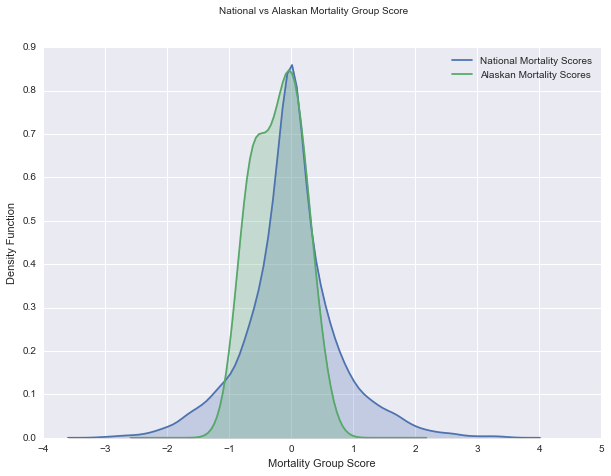

In [24]:
# We can begin by considering Kernel Density Estimates of the Measure Group Scores, we will break out national performance 
# and Alaskan scores

plt.figure(figsize=(10,7))
sns.kdeplot(Mortality["Standardized Outcomes-Mortality Group Score"], shade=True, label= 'National Mortality Scores');
sns.kdeplot(akMort["Standardized Outcomes-Mortality Group Score"], shade=True,label= 'Alaskan Mortality Scores');
sns.plt.suptitle('National vs Alaskan Mortality Group Score')
plt.xlabel('Mortality Group Score')
plt.ylabel('Density Function')

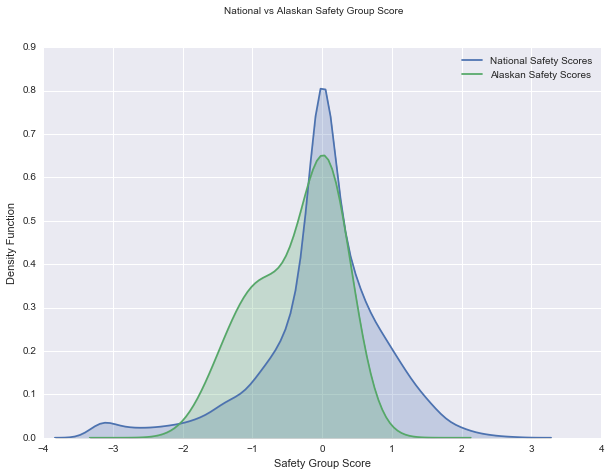

In [25]:
plt.figure(figsize=(10,7))
sns.kdeplot(Safety["Standardized Outcomes-Safety Group Score"], shade=True, label= 'National Safety Scores');
sns.kdeplot(akSafe["Standardized Outcomes-Safety Group Score"], shade=True,label= 'Alaskan Safety Scores');
sns.plt.suptitle('National vs Alaskan Safety Group Score')
plt.xlabel('Safety Group Score')
plt.ylabel('Density Function')

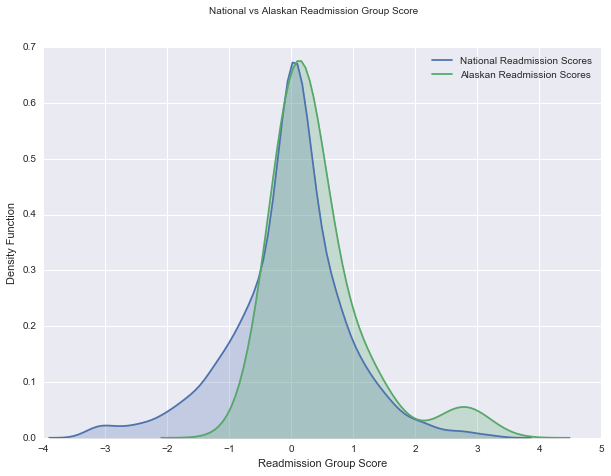

In [26]:
plt.figure(figsize=(10,7))
sns.kdeplot(Readmission["Standardized Outcomes-Readmission Group Score"], shade=True, label= 'National Readmission Scores');
sns.kdeplot(akRead["Standardized Outcomes-Readmission Group Score"], shade=True,label= 'Alaskan Readmission Scores');
sns.plt.suptitle('National vs Alaskan Readmission Group Score')
plt.xlabel('Readmission Group Score')
plt.ylabel('Density Function')

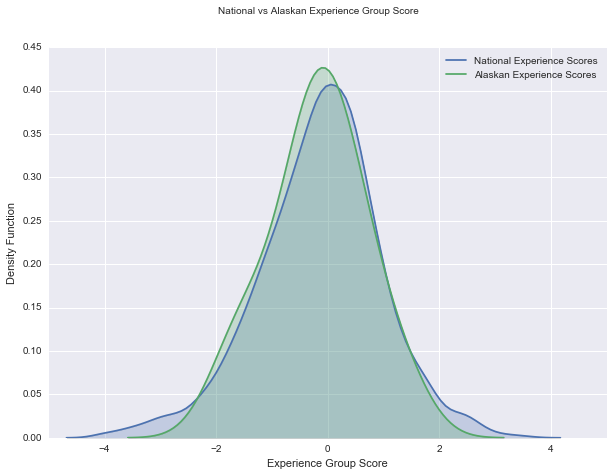

In [27]:
plt.figure(figsize=(10,7))
sns.kdeplot(Experience["Standardized Patient Experience Group Score"], shade=True, label= 'National Experience Scores');
sns.kdeplot(akExp["Standardized Patient Experience Group Score"], shade=True,label= 'Alaskan Experience Scores');
sns.plt.suptitle('National vs Alaskan Experience Group Score')
plt.xlabel('Experience Group Score')
plt.ylabel('Density Function')

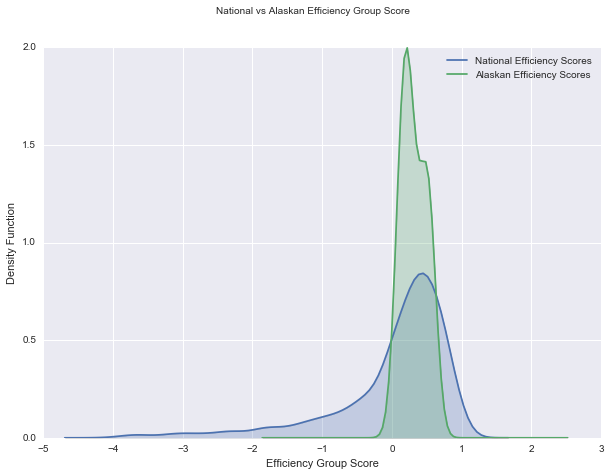

In [28]:
plt.figure(figsize=(10,7))
sns.kdeplot(Efficiency["Standardized Efficiency Group Score"], shade=True, label= 'National Efficiency Scores');
sns.kdeplot(akEff["Standardized Efficiency Group Score"], shade=True,label= 'Alaskan Efficiency Scores');
sns.plt.suptitle('National vs Alaskan Efficiency Group Score')
plt.xlabel('Efficiency Group Score')
plt.ylabel('Density Function')

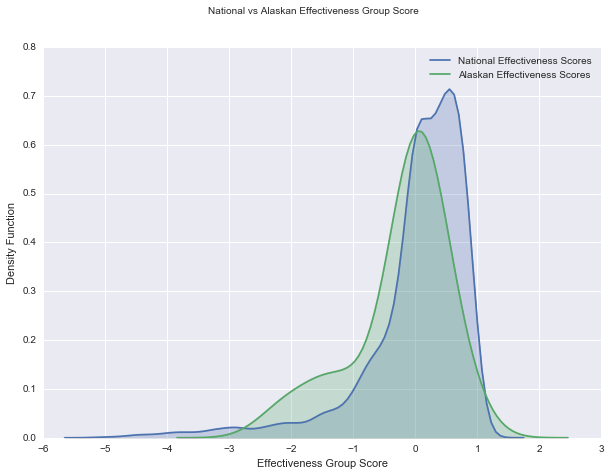

In [29]:
plt.figure(figsize=(10,7))
sns.kdeplot(Effectiveness["Standardized Process-Effectiveness Group Score"], shade=True, label= 'National Effectiveness Scores');
sns.kdeplot(akEffect["Standardized Process-Effectiveness Group Score"], shade=True,label= 'Alaskan Effectiveness Scores');
sns.plt.suptitle('National vs Alaskan Effectiveness Group Score')
plt.xlabel('Effectiveness Group Score')
plt.ylabel('Density Function')

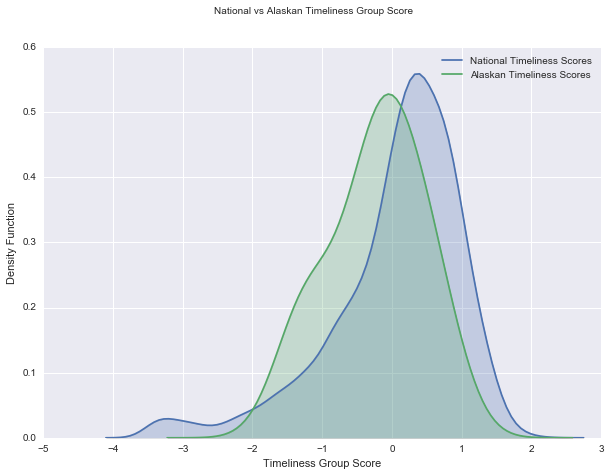

In [30]:
plt.figure(figsize=(10,7))
sns.kdeplot(Timeliness["Standardized Process-Timeliness Group Score"], shade=True, label= 'National Timeliness Scores');
sns.kdeplot(akTime["Standardized Process-Timeliness Group Score"], shade=True,label= 'Alaskan Timeliness Scores');
sns.plt.suptitle('National vs Alaskan Timeliness Group Score')
plt.xlabel('Timeliness Group Score')
plt.ylabel('Density Function')

In [31]:
# In general it would seem that Alaskan hospitals are subject to a unique problem set
# It's also possible that Alaska represents such a small subset of the data, and since we are only looking at a years
# Worth of data that we don't have the complete picture

# Lets see how ANMC's performance compares with the performance of other Alaskan hospitals
# another group to consider in the future might be hospitals serving native populations.

anmc = data.loc[data['Hospital Name']=="ALASKA NATIVE MEDICAL CENTER"]
data = data.loc[data['Hospital Name']!="ALASKA NATIVE MEDICAL CENTER"]
ak_data = data.loc[data['State']=="AK"]

Mortality = data[np.isfinite(data["Standardized Outcomes-Mortality Group Score"])]
Readmission = data[np.isfinite(data["Standardized Outcomes-Readmission Group Score"])]
Safety = data[np.isfinite(data["Standardized Outcomes-Safety Group Score"])]
Experience = data[np.isfinite(data["Standardized Patient Experience Group Score"])]
Efficiency = data[np.isfinite(data["Standardized Efficiency Group Score"])]
Effectiveness = data[np.isfinite(data["Standardized Process-Effectiveness Group Score"])]
Timeliness = data[np.isfinite(data["Standardized Process-Timeliness Group Score"])]


ak_data.index = np.arange(1, len(ak_data)+1)
anmc.index = np.arange(len(ak_data), len(anmc)+len(ak_data))
data.index = np.arange(0, len(data))
data['index']=data.index
anmc['index']=anmc.index
ak_data['index']=ak_data.index


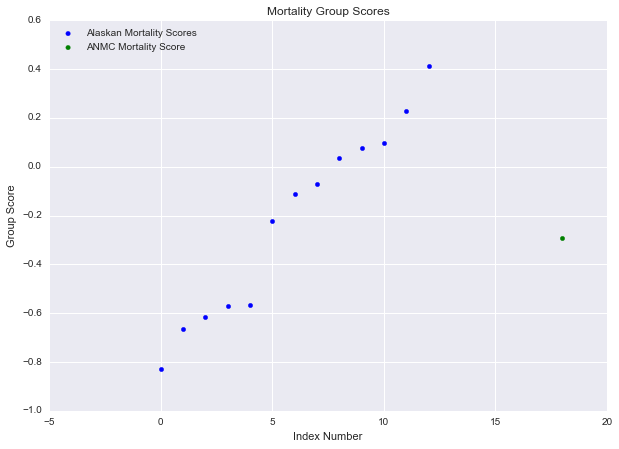

In [32]:
ak_data = ak_data.sort(columns="Standardized Outcomes-Mortality Group Score")
ak_data = ak_data.reset_index(drop=True)
ak_data['index']=ak_data.index

plt.figure(figsize=(10,7))
plt.xlabel('Index Number')
plt.ylabel('Group Score')

plt.scatter(ak_data['index'],ak_data['Standardized Outcomes-Mortality Group Score'],color='b',label='Alaskan Mortality Scores')
plt.scatter(anmc['index'],anmc['Standardized Outcomes-Mortality Group Score'],color='g',label = 'ANMC Mortality Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.title('Mortality Group Scores')
plt.show()

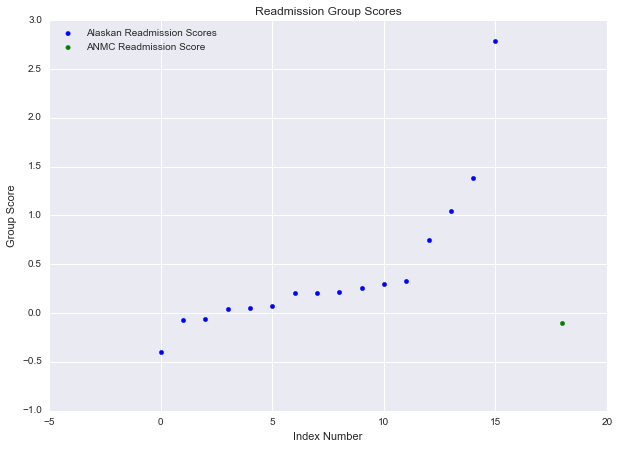

In [33]:
ak_data = ak_data.sort(columns="Standardized Outcomes-Readmission Group Score")
ak_data = ak_data.reset_index(drop=True)
ak_data['index']=ak_data.index

plt.figure(figsize=(10,7))
plt.xlabel('Index Number')
plt.ylabel('Group Score')

plt.scatter(ak_data['index'],ak_data['Standardized Outcomes-Readmission Group Score'],color='b',label='Alaskan Readmission Scores')
plt.scatter(anmc['index'],anmc['Standardized Outcomes-Readmission Group Score'],color='g',label = 'ANMC Readmission Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.title('Readmission Group Scores')
plt.show()

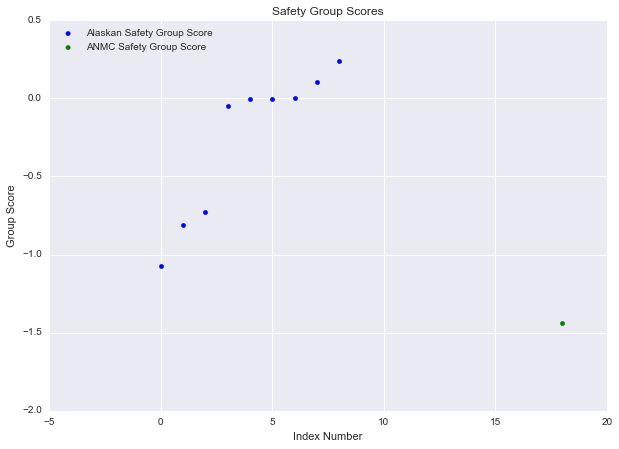

In [34]:
ak_data = ak_data.sort(columns="Standardized Outcomes-Safety Group Score")
ak_data = ak_data.reset_index(drop=True)
ak_data['index']=ak_data.index

plt.figure(figsize=(10,7))
plt.xlabel('Index Number')
plt.ylabel('Group Score')

plt.scatter(ak_data['index'],ak_data['Standardized Outcomes-Safety Group Score'],color='b',label = 'Alaskan Safety Group Score')
plt.scatter(anmc['index'],anmc['Standardized Outcomes-Safety Group Score'],color='g', label = 'ANMC Safety Group Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.title('Safety Group Scores')
plt.show()

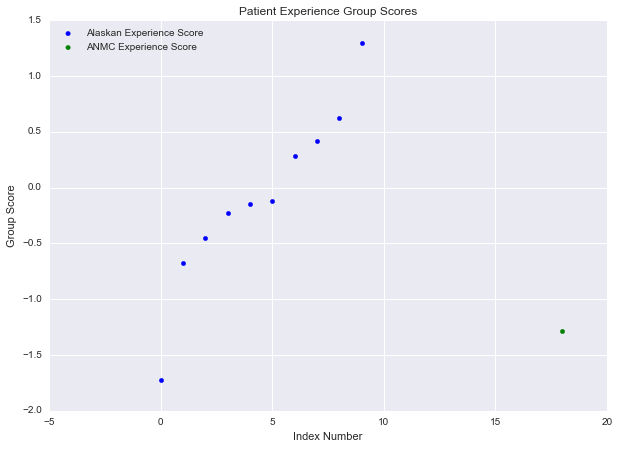

In [35]:
ak_data = ak_data.sort(columns="Standardized Patient Experience Group Score")
ak_data = ak_data.reset_index(drop=True)
ak_data['index']=ak_data.index

plt.figure(figsize=(10,7))
plt.xlabel('Index Number')
plt.ylabel('Group Score')

plt.scatter(ak_data['index'],ak_data['Standardized Patient Experience Group Score'],color='b',label = 'Alaskan Experience Score')
plt.scatter(anmc['index'],anmc['Standardized Patient Experience Group Score'],color='g', label = 'ANMC Experience Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.title('Patient Experience Group Scores')
plt.show()

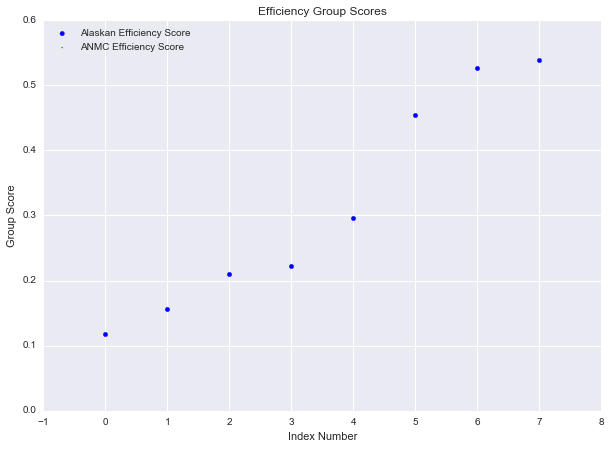

In [36]:
ak_data = ak_data.sort(columns="Standardized Efficiency Group Score")
ak_data = ak_data.reset_index(drop=True)
ak_data['index']=ak_data.index

plt.figure(figsize=(10,7))
plt.xlabel('Index Number')
plt.ylabel('Group Score')

plt.scatter(ak_data['index'],ak_data['Standardized Efficiency Group Score'],color='b',label='Alaskan Efficiency Score')
plt.scatter(anmc['index'],anmc['Standardized Efficiency Group Score'],color='g', label = 'ANMC Efficiency Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.title('Efficiency Group Scores')
plt.show()

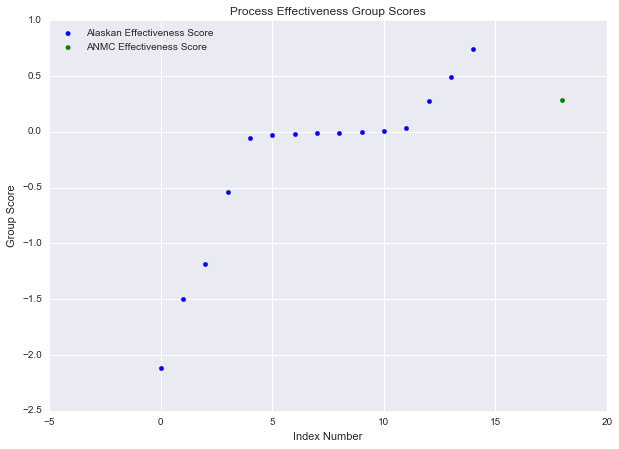

In [37]:
ak_data = ak_data.sort(columns="Standardized Process-Effectiveness Group Score")
ak_data = ak_data.reset_index(drop=True)
ak_data['index']=ak_data.index

plt.figure(figsize=(10,7))
plt.xlabel('Index Number')
plt.ylabel('Group Score')

plt.scatter(ak_data['index'],ak_data['Standardized Process-Effectiveness Group Score'],color='b', label='Alaskan Effectiveness Score')
plt.scatter(anmc['index'],anmc['Standardized Process-Effectiveness Group Score'],color='g', label='ANMC Effectiveness Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.title('Process Effectiveness Group Scores')
plt.show()

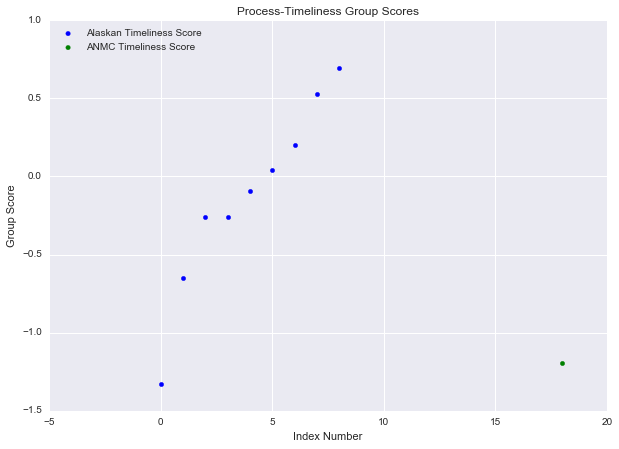

In [38]:
ak_data = ak_data.sort(columns="Standardized Process-Timeliness Group Score")
ak_data = ak_data.reset_index(drop=True)
ak_data['index']=ak_data.index

plt.figure(figsize=(10,7))
plt.xlabel('Index Number')
plt.ylabel('Group Score')

plt.scatter(ak_data['index'],ak_data['Standardized Process-Timeliness Group Score'],color='b', label = 'Alaskan Timeliness Score')
plt.scatter(anmc['index'],anmc['Standardized Process-Timeliness Group Score'],color='g', label = 'ANMC Timeliness Score')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.title('Process-Timeliness Group Scores')
plt.show()

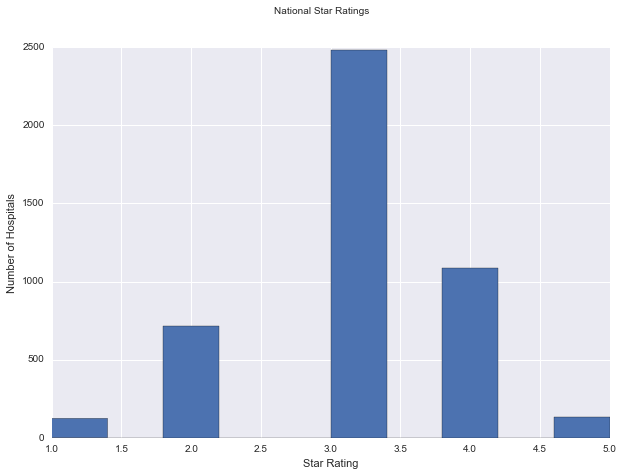

In [39]:
# Clearly ANMC performs poorly compared with other reporting hospitals among Alaskan Hospitals
# But in some measures we perform very strongly! 

# Lets look at how these Group Scores impact the Summary Score and Star Ratings

plt.figure(figsize=(10,7))
plt.hist(data["Star Rating"],  label= 'National Star Rating');
sns.plt.suptitle('National Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Hospitals')


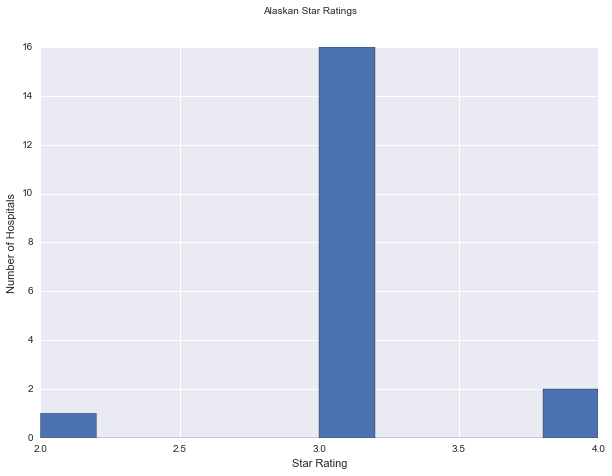

In [40]:
# We can see that Alaskan hospitals dont have the nice distribution that we see nationally,
# Almost all rate 3 stars.

plt.figure(figsize=(10,7))
plt.hist(akData["Star Rating"],  label= 'National Star Rating');
sns.plt.suptitle('Alaskan Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Hospitals')

In [41]:
# Now that we have some grasp of the general distribution of the summary scores and star ratings,
# Both in terms of Alaskan and National datasets

#Lets see how our Summary Score and Star Ratings compare with the means.

print "Summary Scores"
print "ANMC Summary Score : ", anmc['Hospital Summary Score'].iloc[0]
print "National Summary Score mean : ", data['Hospital Summary Score'].mean()
print "Alaskan Summary Score mean : ", akData['Hospital Summary Score'].mean()
print
print "Star Ratings"
print "ANMC Star Rating : ", anmc['Star Rating'].iloc[0]
print "National Star Rating : ", data['Star Rating'].mean()
print "Alaskan mean Star Rating : ", akData['Star Rating'].mean()

Summary Scores
ANMC Summary Score :  -0.750839385
National Summary Score mean :  -0.0268835935503
Alaskan Summary Score mean :  0.00306215621053

Star Ratings
ANMC Star Rating :  2
National Star Rating :  3.08518600044
Alaskan mean Star Rating :  3.05263157895


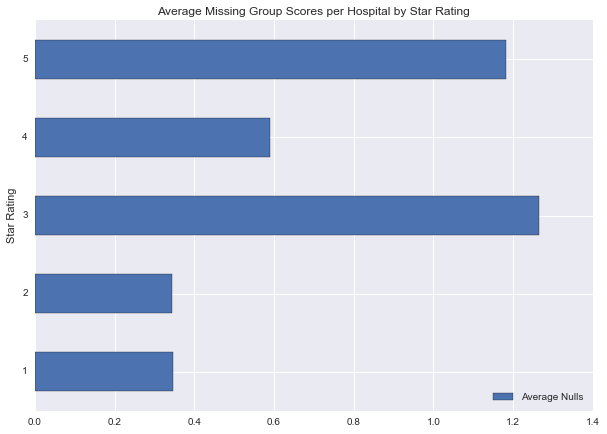

In [42]:
# Clearly ANMC performs less favorably on the Summary Score and Star Rating than we'd like
# Before we got about trying to improve performance we can explore an explanation
# When we looked at the raw data it appeared there was a relationship between not reporting individual measures
# and a higher star rating, is it possible that the same thing is happening at the Summary Score level?

#Just as we noted a serious amount of null data in the raw data
# We might also find that few hospitals report all measures

measuresAK = akData[['Provider ID','Standardized Outcomes-Mortality Group Score','Standardized Outcomes-Readmission Group Score',
                  'Standardized Outcomes-Safety Group Score','Standardized Patient Experience Group Score',
                   'Standardized Efficiency Group Score','Standardized Process-Effectiveness Group Score',
                  'Standardized Process-Timeliness Group Score']]
measuresAK['null'] = measuresAK.isnull().sum(axis=1)
measuresAK['Star Rating'] = akData['Star Rating']

measuresNat = data[['Provider ID','Standardized Outcomes-Mortality Group Score','Standardized Outcomes-Readmission Group Score',
                  'Standardized Outcomes-Safety Group Score','Standardized Patient Experience Group Score',
                   'Standardized Efficiency Group Score','Standardized Process-Effectiveness Group Score',
                  'Standardized Process-Timeliness Group Score']]
measuresNat['null'] = measuresNat.isnull().sum(axis=1)
measuresNat['Star Rating'] = data['Star Rating']

#Naively we might expect to find that hospitals which reported all Measure Groups are scoring higher
#This doesent seem to be the case, generally it seems hospitals tend to drop a score a score,
# More detailed analysis needs to be done here

missing_groups_rating = measuresNat.groupby('Star Rating')['null'].sum()/measuresNat.groupby("Star Rating")["Provider ID"].count()
df = pd.DataFrame({'Star Rating':missing_groups_rating.index, 'Average Nulls':missing_groups_rating.values})
df.plot(kind="barh", y="Average Nulls", x="Star Rating",
        title='Average Missing Group Scores per Hospital by Star Rating', figsize=(10,7))

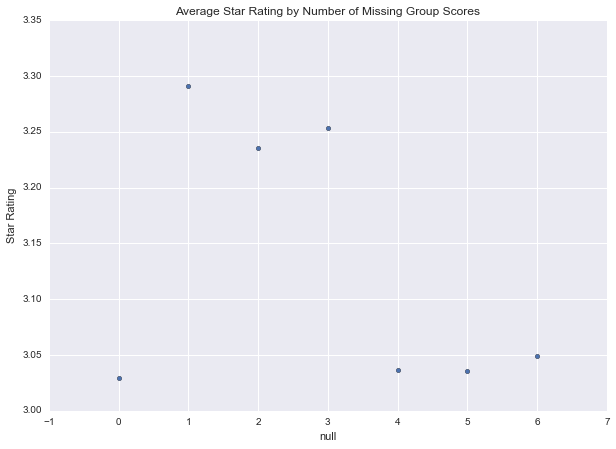

In [43]:
# We could also look at this question by looking at the average star rating 
# per number of missing Group Scores, again theres not an obvious pattern to this data
# This could use further analysis, but we can proceed to trying to improve the Summary Score without it

plt.figure(figsize=(10,7))
avg_r = measuresNat.groupby("null")["Star Rating"].mean()
avg_r = avg_r.to_frame()
avg_r["null"] = avg_r.index
avg_r.plot(kind="scatter", x="null", y="Star Rating", 
           title='Average Star Rating by Number of Missing Group Scores', figsize=(10,7))

In [44]:
# What are the minimum Summary Scores by Star Rating
data.groupby("Star Rating")["Hospital Summary Score"].min()

Star Rating
1   -1.989404
2   -1.053099
3   -0.383485
4    0.205287
5    0.826310
Name: Hospital Summary Score, dtype: float64

In [45]:
# What are the maximum Summary Scores by Star Rating
data.groupby("Star Rating")["Hospital Summary Score"].max()

Star Rating
1   -1.053592
2   -0.384145
3    0.204889
4    0.817399
5    2.036352
Name: Hospital Summary Score, dtype: float64

In [46]:
dif = pd.DataFrame(index=['National Mean','ANMC Score'], columns=['Mortality','Readmission','Safety','Experience',
                                                                               'Efficiency','Effectiveness','Timeliness'])
dif.set_value('National Mean', 'Mortality', Mortality['Standardized Outcomes-Mortality Group Score'].mean())
dif.set_value('National Mean', 'Readmission', Readmission['Standardized Outcomes-Readmission Group Score'].mean())
dif.set_value('National Mean', 'Safety', Safety['Standardized Outcomes-Safety Group Score'].mean())
dif.set_value('National Mean', 'Experience', Experience["Standardized Patient Experience Group Score"].mean())
dif.set_value('National Mean', 'Efficiency', Efficiency["Standardized Efficiency Group Score"].mean())
dif.set_value('National Mean', 'Effectiveness', Effectiveness["Standardized Process-Effectiveness Group Score"].mean())
dif.set_value('National Mean', 'Timeliness', Timeliness["Standardized Process-Timeliness Group Score"].mean())

dif.set_value('ANMC Score', 'Mortality', anmc['Standardized Outcomes-Mortality Group Score'].max())
dif.set_value('ANMC Score', 'Readmission', anmc['Standardized Outcomes-Readmission Group Score'].max())
dif.set_value('ANMC Score', 'Safety', anmc['Standardized Outcomes-Safety Group Score'].max())
dif.set_value('ANMC Score', 'Experience', anmc["Standardized Patient Experience Group Score"].max())
dif.set_value('ANMC Score', 'Efficiency', anmc["Standardized Efficiency Group Score"].max())
dif.set_value('ANMC Score', 'Effectiveness', anmc["Standardized Process-Effectiveness Group Score"].max())
dif.set_value('ANMC Score', 'Timeliness', anmc["Standardized Process-Timeliness Group Score"].max())

,Mortality,Readmission,Safety,Experience,Efficiency,Effectiveness,Timeliness
National Mean,-0.00163024,-0.0376741,-0.0158902,-0.144323,0.0133755,0.0219172,0.05955
ANMC Score,-0.291302,-0.0978241,-1.441,-1.28158,NaN,0.28571,-1.19144
